In [27]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# Random choice for pivot
def quicksort_random(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)  
    
    # Choosing a random pivot
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort_random(left) + middle + quicksort_random(right)

In [29]:
# Non-random choice for pivot
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    # Choosing the middle element as pivot
    pivot = arr[len(arr) // 2]  
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

In [31]:
def benchmark_quicksort(n_values, case_type):
    times = []
    for n in n_values:
        if case_type == "best":
            arr = list(range(n))  # Already sorted array
        elif case_type == "worst":
            arr = list(range(n, 0, -1))  # Reverse sorted array
        elif case_type == "average":
            arr = np.random.randint(0, n, n)  # Random array
        
        start_time = time.time()
        quicksort(arr)
        end_time = time.time()
        
        times.append(end_time - start_time)
    return times

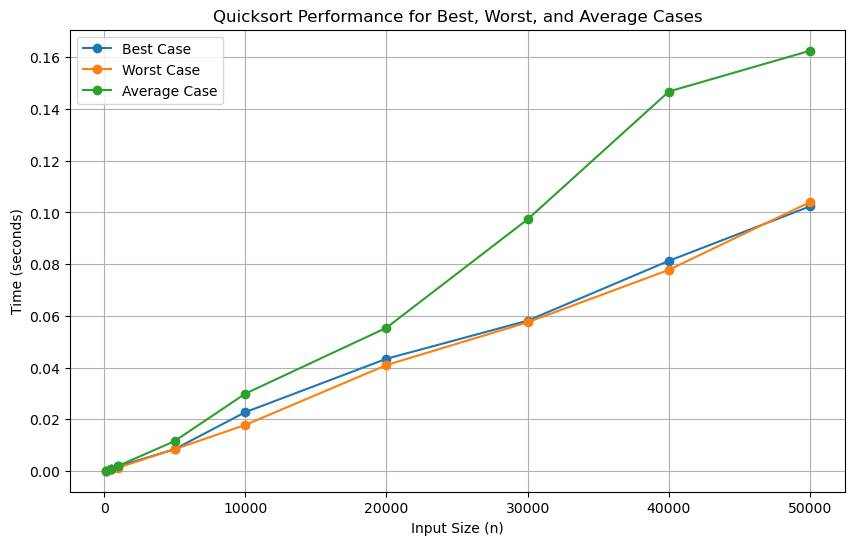

In [33]:
n_values = [100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000]

best_case_times = benchmark_quicksort(n_values, "best")
worst_case_times = benchmark_quicksort(n_values, "worst")
average_case_times = benchmark_quicksort(n_values, "average")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, best_case_times, label="Best Case", marker="o")
plt.plot(n_values, worst_case_times, label="Worst Case", marker="o")
plt.plot(n_values, average_case_times, label="Average Case", marker="o")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (seconds)")
plt.title("Quicksort Performance for Best, Worst, and Average Cases")
plt.legend()
plt.grid(True)
plt.show()